{
  'flv': {
    'dt': 0,
    'sns': [
      783,
      427,
      276,
      247,
      270
    ],
    'sp': 0,
    'tn': 48.6
  },
  'lp': {
    'dt': 0,
    'err': -162,
    'o': -48.6,
    'po': -48.6,
    'io': 0,
    'do': 0
  },
  'rp': {
    'dt': 0,
    'err': 0,
    'o': 0.0,
    'po': 0.0,
    'io': 0,
    'do': 0
  }
}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loader import load_data 

In [2]:
with open('./data/breakdown1.log', mode='r') as data_file:
    lines = data_file.readlines()
sensor0=[]
sensor1=[]
sensor2=[]
sensor3=[]
sensor4=[]
left_pid_out = []
right_pid_out = []
actual_right_pid_out = []

for line in lines:
    metric = eval(line)
    sensor0.append(metric['flv']['sns'][0])
    sensor1.append(metric['flv']['sns'][1])
    sensor2.append(metric['flv']['sns'][2])
    sensor3.append(metric['flv']['sns'][3])
    sensor4.append(metric['flv']['sns'][4])
    left_pid_out.append(metric['lp']['o']*-1)
    right_pid_out.append(metric['rp']['o']*-1)



In [3]:
actual_right_pid_out = right_pid_out.copy()
for i in range(0, len(left_pid_out),1):
    if left_pid_out[i] > 0:
        actual_right_pid_out[i] = 0
    

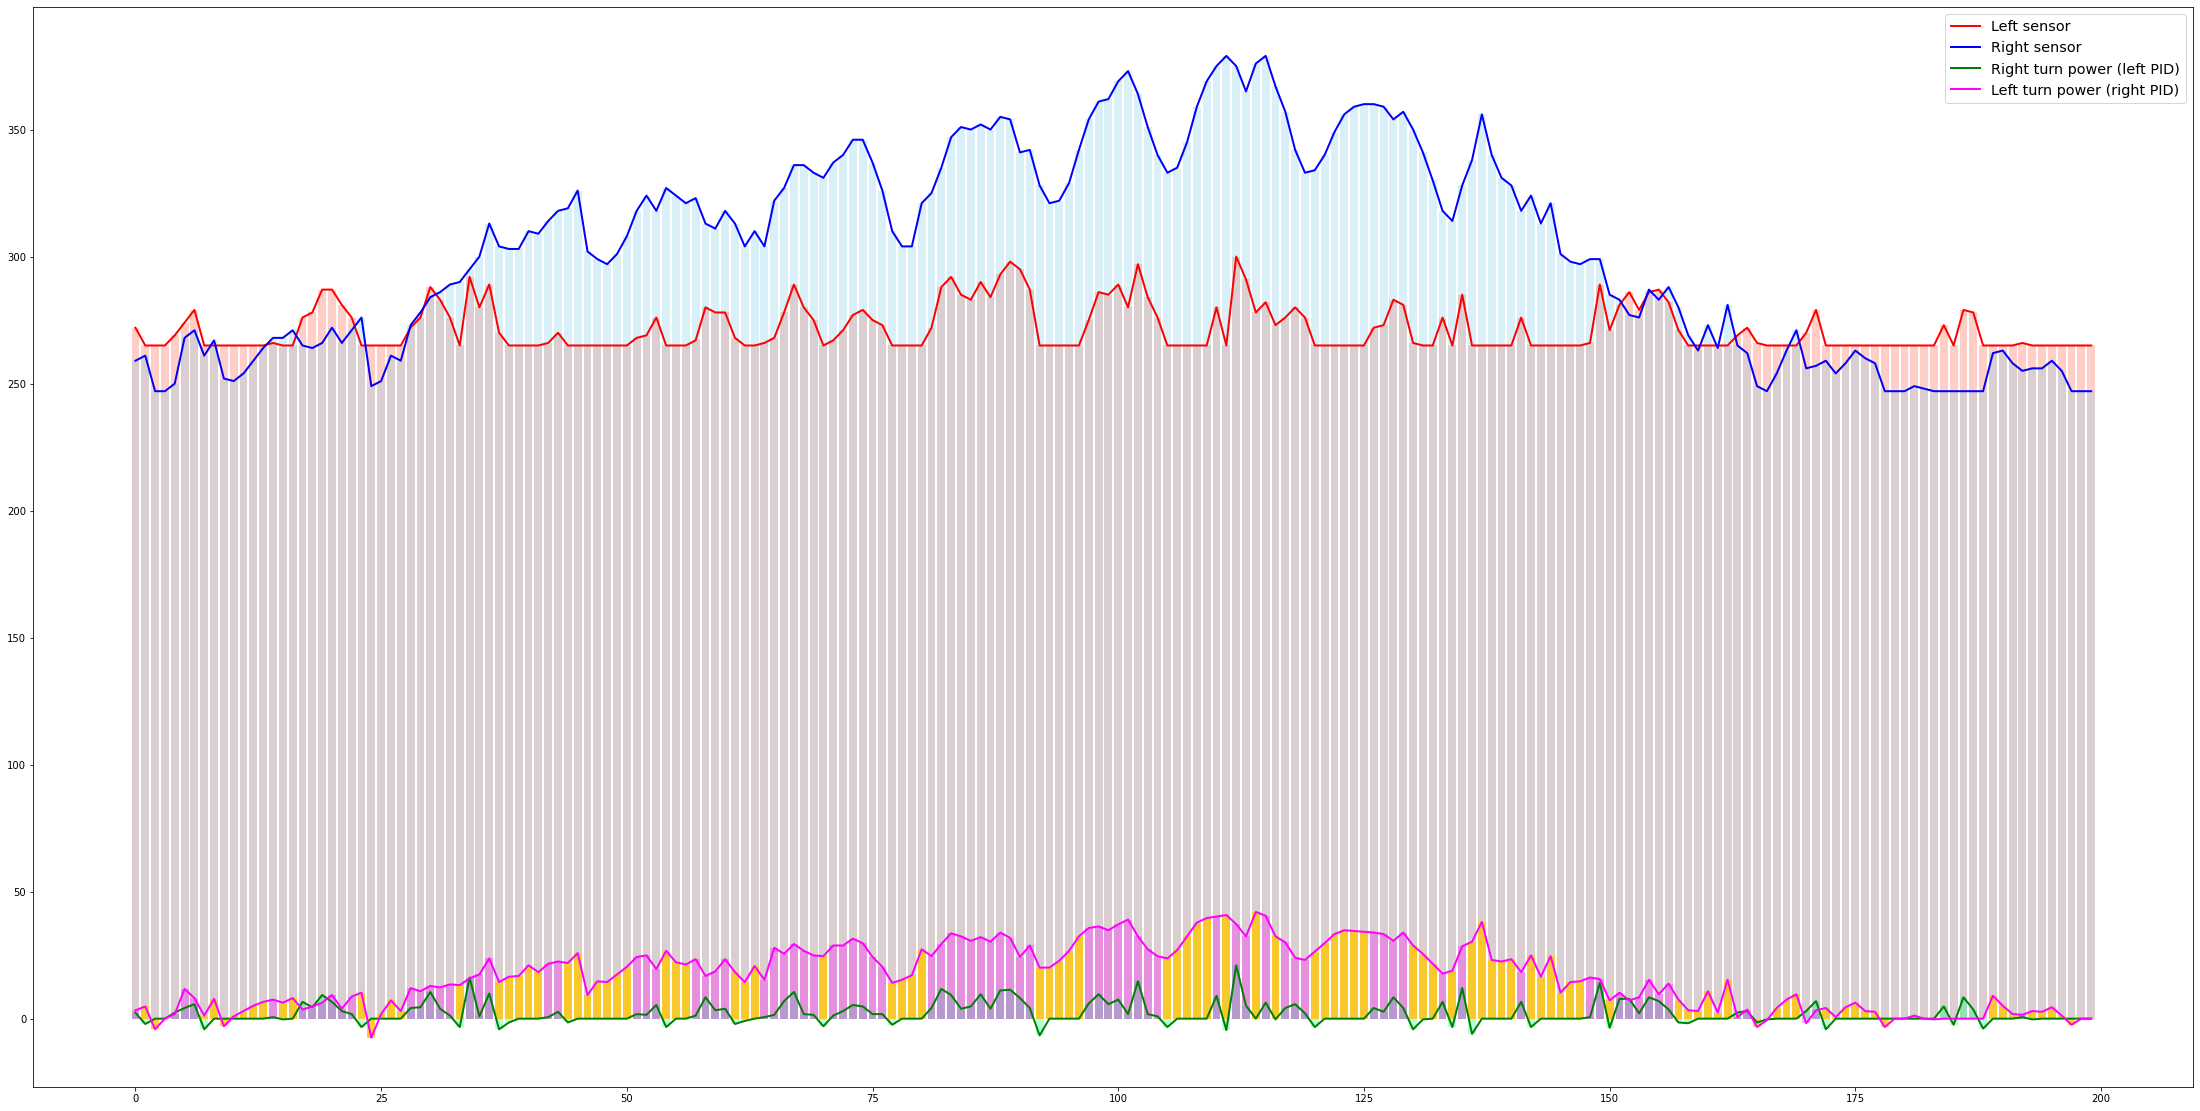

In [4]:
range = 200
start = 2800
end = start + range
fig = plt.figure(figsize=(30, 15))
ax = fig.add_axes([0,0,1,1])

ax.plot(sensor1[start:end], linewidth=2.0, color = 'red', label='Left sensor')
ax.bar(np.arange(0,range,1), sensor1[start:end], color = 'tomato', alpha = 0.3)
ax.plot(sensor3[start:end], linewidth=2.0, color = 'blue', label = 'Right sensor')
ax.bar(np.arange(0,range,1), sensor3[start:end], color = 'skyblue', alpha = 0.3)

ax.plot(left_pid_out[start:end], linewidth=2.0, color = 'green', label = 'Right turn power (left PID)')
ax.bar(np.arange(0,range,1), left_pid_out[start:end], alpha = 0.3, color = 'springgreen')
ax.plot(right_pid_out[start:end], linewidth=2.0, color = 'magenta', label = 'Left turn power (right PID)')
ax.bar(np.arange(0,range,1), right_pid_out[start:end], alpha = 0.3, color = 'magenta')

ax.bar(np.arange(0,range,1), actual_right_pid_out[start:end], alpha = 0.8, color = 'gold')
ax.legend(fontsize = 'x-large')


Видно, что при возникновении ложных значений левого PID датчика происходит потеря упраялющих воздействия от актуального PID, что приводит к выбросу с линии

Проблема в этом коде:

```
if left_sensor_pid_out < 0:
    self._bot_truck.setTurnPower(-left_sensor_pid_out)
    self._sendTelemetry(all_sensors_values, delta_time)
    continue

if right_sensor_pid_out < 0:
    self._bot_truck.setTurnPower(right_sensor_pid_out)
    self._sendTelemetry(all_sensors_values, delta_time)
    continue
```